In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.listdir(r"C:\Users\Geetha\Desktop\sprint 1")


['ratings.csv']

In [31]:
data=pd.read_csv(r"C:\Users\Geetha\Desktop\sprint 1\ratings.csv")
print(data)

            Game Name           Developer              Genre  Rating
0    Candy Crush Saga                King             Puzzle     4.6
1      Clash of Clans           Supercell           Strategy     4.5
2            Among Us          InnerSloth              Party     4.4
3          Pokémon GO             Niantic  Augmented Reality     4.3
4         PUBG Mobile       Tencent Games      Battle Royale     4.2
..                ...                 ...                ...     ...
96     Stardew Valley        ConcernedApe         Simulation     4.7
97              Hades    Supergiant Games             Action     4.9
98        Plague Inc.    Ndemic Creations           Strategy     4.5
99   Alto's Adventure  Noodlecake Studios     Endless Runner     4.7
100          The Room     Fireproof Games             Puzzle     4.8

[101 rows x 4 columns]


In [5]:
data.head()

,Game Name,Developer,Genre,Rating
0,Candy Crush Saga,King,Puzzle,4.6
1,Clash of Clans,Supercell,Strategy,4.5
2,Among Us,InnerSloth,Party,4.4
3,Pokémon GO,Niantic,Augmented Reality,4.3
4,PUBG Mobile,Tencent Games,Battle Royale,4.2


In [6]:
data.tail()

,Game Name,Developer,Genre,Rating
96,Stardew Valley,ConcernedApe,Simulation,4.7
97,Hades,Supergiant Games,Action,4.9
98,Plague Inc.,Ndemic Creations,Strategy,4.5
99,Alto's Adventure,Noodlecake Studios,Endless Runner,4.7
100,The Room,Fireproof Games,Puzzle,4.8


In [7]:
data.describe()

,Rating
count,101.000000
mean,4.398020
std,0.175488
min,4.100000
25%,4.300000
50%,4.400000
75%,4.500000
max,4.900000


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [12]:
data.columns

Index(['Game Name', 'Developer', 'Genre', 'Rating'], dtype='object')

In [14]:
# Sort by rating and select top 10 games
top_rated_games = data.nlargest(10, 'Rating')[['Game Name', 'Developer', 'Genre', 'Rating']]
print(top_rated_games)

              Game Name           Developer           Genre  Rating
97                Hades    Supergiant Games          Action     4.9
14            Minecraft              Mojang         Sandbox     4.8
95      Monument Valley         Ustwo Games          Puzzle     4.8
100            The Room     Fireproof Games          Puzzle     4.8
7        Genshin Impact              miHoYo      Action RPG     4.7
96       Stardew Valley        ConcernedApe      Simulation     4.7
99     Alto's Adventure  Noodlecake Studios  Endless Runner     4.7
0      Candy Crush Saga                King          Puzzle     4.6
15   Asphalt 9: Legends            Gameloft          Racing     4.6
33         CSR Racing 2       NaturalMotion          Racing     4.6


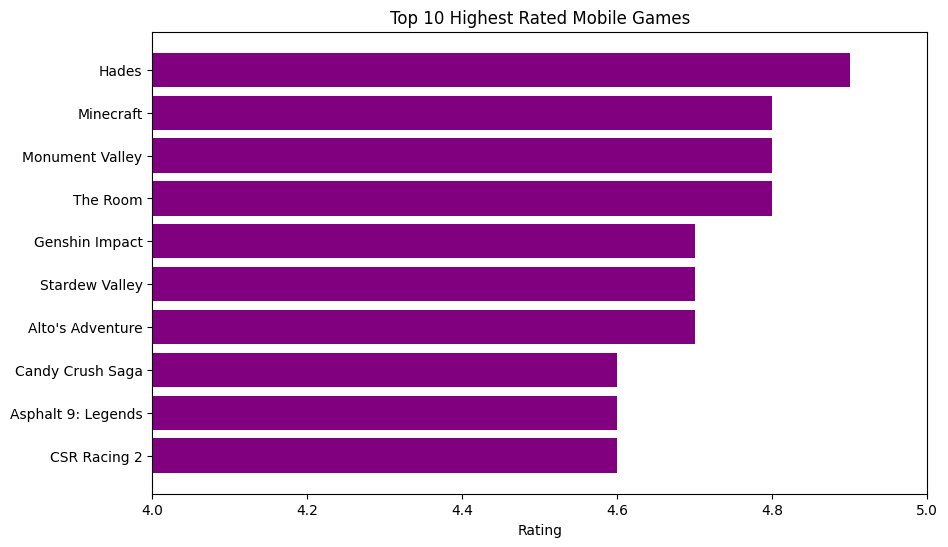

In [17]:
top_rated_games = data.nlargest(10, 'Rating')[['Game Name', 'Developer', 'Genre', 'Rating']]
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_rated_games['Game Name'], top_rated_games['Rating'], color='purple')
plt.xlabel('Rating')
plt.title('Top 10 Highest Rated Mobile Games')
plt.xlim(4, 5)  # Limiting the x-axis for better visualization of differences
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()

In [ ]:
#This visualization will give you a quick overview of the top 10 highest rated mobile games and their respective ratings
 #Use nlargest() to sort the Data by 'Rating' in descending order and select the top 10 games. Only select the columns 
'Game Name' and 'Rating' for visualization.


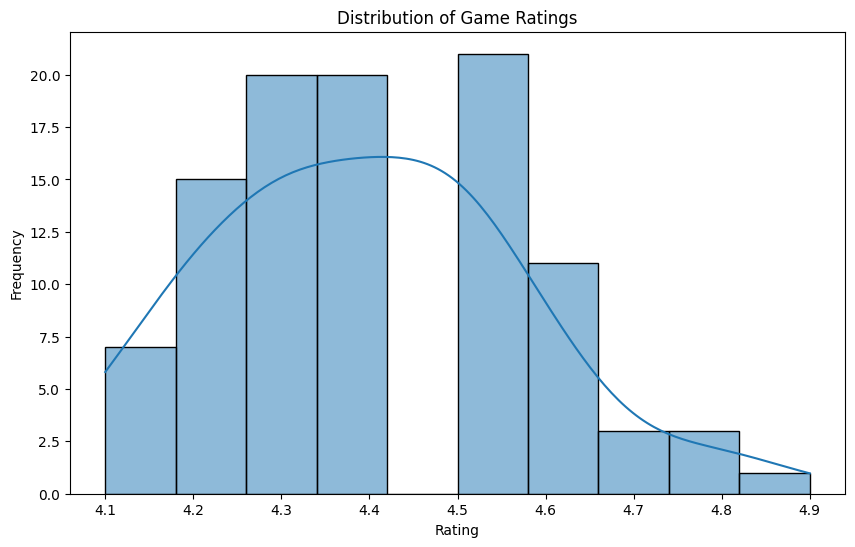

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True, bins=10)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
The ratings are mostly clustered around 4.3 to 4.6, with a peak around the 4.4 mark.
The distribution is relatively narrow, indicating most games have high ratings within this dataset.

,Rating
Developer,
Supergiant Games,4.90
Mojang,4.80
Ustwo Games,4.80
Fireproof Games,4.80
ConcernedApe,4.70
Noodlecake Studios,4.70
miHoYo,4.65
Hipster Whale,4.60
505 Games,4.60


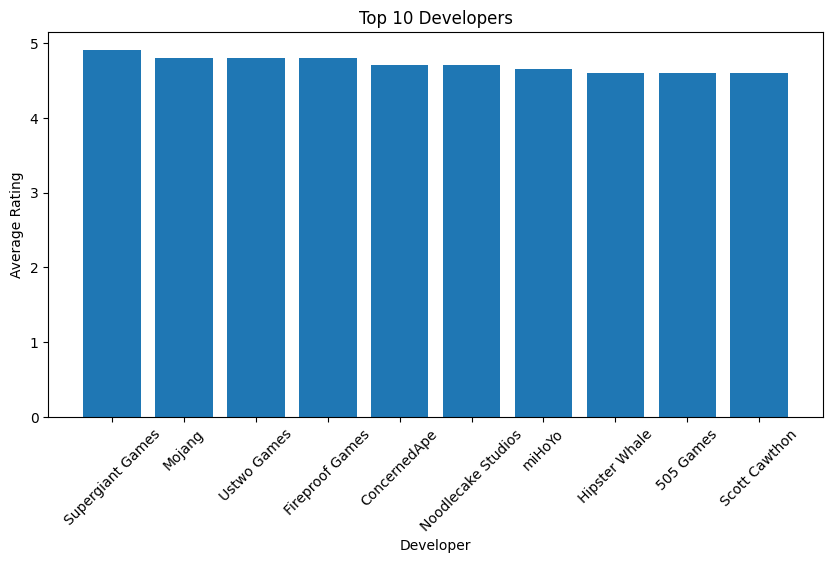

In [33]:
# TOP 10 DEVELOPERS
avg_rating_by_developer_data = data[['Rating', 'Developer']].groupby('Developer').mean().round(2).sort_values(by='Rating', ascending=False)
display(avg_rating_by_developer_data.head(10))
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title('Top 10 Developers')
plt.xlabel('Developer')
plt.ylabel('Average Rating')
plt.bar(avg_rating_by_developer_data.head(10).index, avg_rating_by_developer_data.head(10)['Rating'])
plt.xticks(rotation=45)
plt.show()


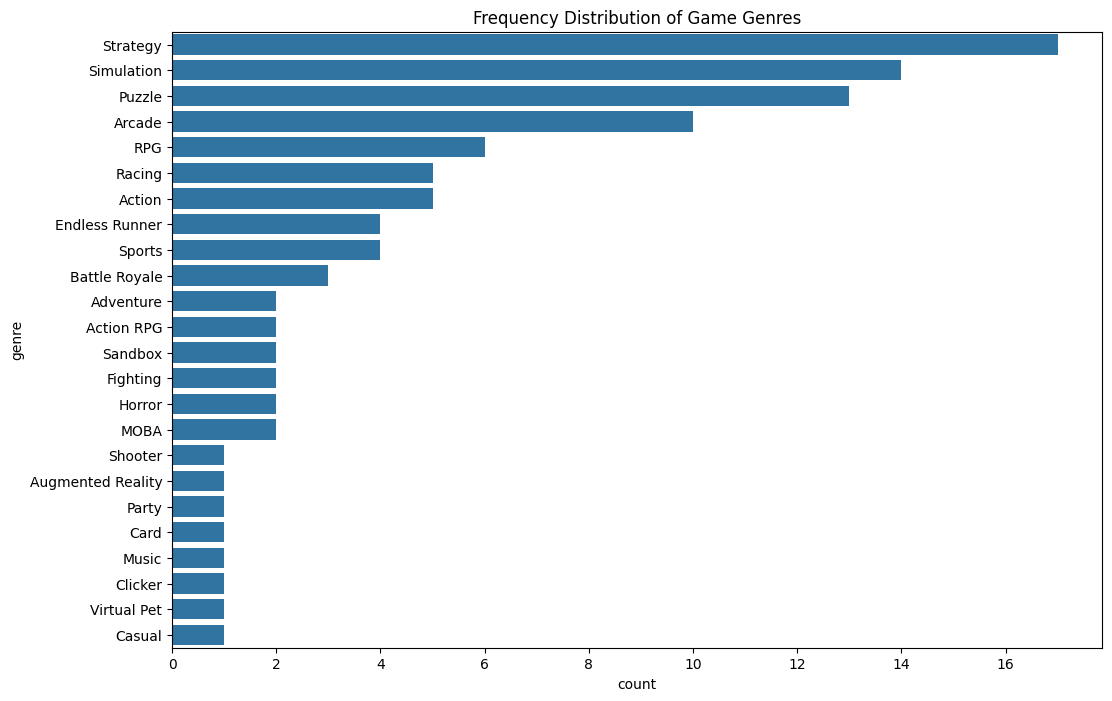

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Frequency Distribution of Game Genres')
plt.xlabel('count')
plt.ylabel('genre')
plt.show()

In [ ]:
The most frequent genres include Puzzle, Strategy, and Battle Royale.
Some genres are less represented, indicating a possible skew towards popular genres.